In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')

In [25]:
delays_df = pd.read_csv('FlightDelays.csv')
delays_df.head()

,departure_time,carrier,destination,origin,day_of_week,flight_status
0,1455,OH,JFK,BWI,4,ontime
1,1640,DH,JFK,DCA,4,ontime
2,1245,DH,LGA,IAD,4,ontime
3,1715,DH,LGA,IAD,4,ontime
4,1039,DH,LGA,IAD,4,ontime


In [26]:
delays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   departure_time  2201 non-null   int64 
 1   carrier         2201 non-null   object
 2   destination     2201 non-null   object
 3   origin          2201 non-null   object
 4   day_of_week     2201 non-null   int64 
 5   flight_status   2201 non-null   object
dtypes: int64(2), object(4)
memory usage: 103.3+ KB


In [27]:
#How many flights are delayed? 
delays_df.flight_status.value_counts()

ontime     1773
delayed     428
Name: flight_status, dtype: int64

In [28]:
#Find the number of flights from each origin to each destination
#BWI has the lowest number of flights to New York.
pd.crosstab(delays_df.origin, delays_df.destination)

destination,EWR,JFK,LGA
origin,,,
BWI,115,30,0
DCA,256,149,965
IAD,294,207,185


In [29]:
#Find the number of flights of each carrier from each airport: Only RU flies from all three airports in DC.
pd.crosstab(delays_df.carrier, delays_df.origin)

origin,BWI,DCA,IAD
carrier,,,
CO,0,94,0
DH,0,27,524
DL,0,388,0
MQ,0,295,0
OH,30,0,0
RU,115,162,131
UA,0,0,31
US,0,404,0


In [30]:
#Find the number of flights of each carrier to each airport: Only DH flies to all three airports in NYC.
#CO, OH, RU, UA, and US fly to only one airport in New York.
pd.crosstab(delays_df.carrier, delays_df.destination)

destination,EWR,JFK,LGA
carrier,,,
CO,94,0,0
DH,163,234,154
DL,0,31,357
MQ,0,91,204
OH,0,30,0
RU,408,0,0
UA,0,0,31
US,0,0,404


[Text(0.5, 1.0, 'Number of flights')]

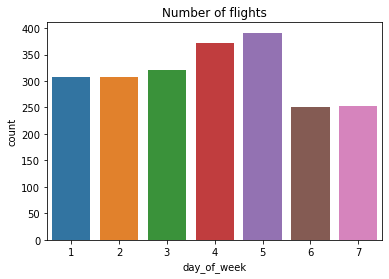

In [31]:
# Analyze the daily number of flights: Friday has the highest number of flights. Weekend is less busy compared to weekdays.
sn.countplot(x='day_of_week',data=delays_df).set(title='Number of flights')

[Text(0.5, 1.0, 'Number of flights')]

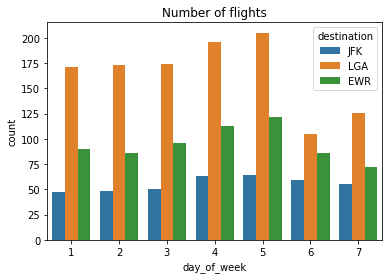

In [32]:
#Analyze the daily number of flights for each destination: LGA is the busiest destination.
sn.countplot(x='day_of_week',data=delays_df, hue='destination').set(title='Number of flights')

In [42]:
# Create an indicator variable
delays_df['is_delayed'] = [1 if status == 'delayed' else 0 for status in delays_df['flight_status']]  
delays_df.head()

,departure_time,carrier,destination,origin,day_of_week,flight_status,is_delayed
0,1455,OH,JFK,BWI,4,ontime,0
1,1640,DH,JFK,DCA,4,ontime,0
2,1245,DH,LGA,IAD,4,ontime,0
3,1715,DH,LGA,IAD,4,ontime,0
4,1039,DH,LGA,IAD,4,ontime,0


In [34]:
# Group information by day of week and determine the average delay for each day.
average_delay_by_day = delays_df.groupby('day_of_week')['is_delayed'].mean().reset_index()
average_delay_by_day

,day_of_week,is_delayed
0,1,0.272727
1,2,0.205212
2,3,0.178125
3,4,0.153226
4,5,0.191816
5,6,0.096000
6,7,0.268775


[Text(0.5, 1.0, 'Average delay')]

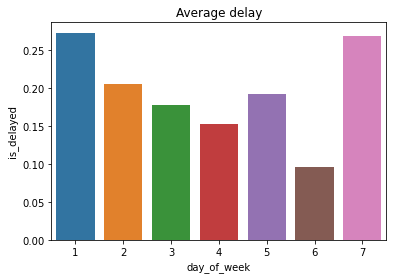

In [35]:
# Create a bar chart to analyze the average delay for each day: Passengers flying on Monday and Sunday are more likely to experience delays. 
sn.barplot(x='day_of_week', y='is_delayed', data=average_delay_by_day).set(title='Average delay')

[Text(0.5, 1.0, 'Average delay')]

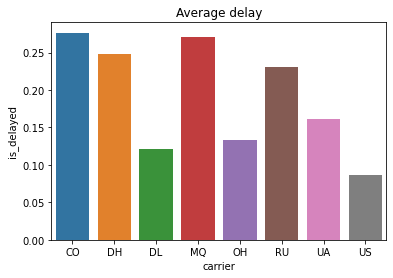

In [36]:
#Analyze the average delay by carrier: Flights of CO, MQ delay more on average. US is the best in terms of arriving on time.
average_delay_by_carrier = delays_df.groupby('carrier')['is_delayed'].mean().reset_index()
sn.barplot(x='carrier', y='is_delayed', data=average_delay_by_carrier).set(title='Average delay')

[Text(0.5, 1.0, 'Average delay')]

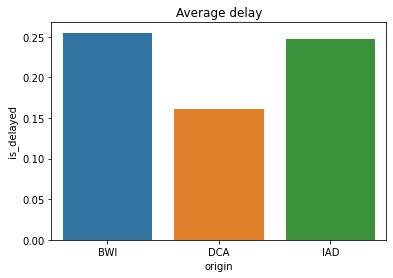

In [37]:
#Analyze the average delay by origin: Higher number of flights from DCA arrives on time on average, compared to BWI&IAD.
average_delay_by_origin = delays_df.groupby('origin')['is_delayed'].mean().reset_index()
sn.barplot(x='origin', y='is_delayed', data=average_delay_by_origin).set(title='Average delay')

[Text(0.5, 1.0, 'Average delay')]

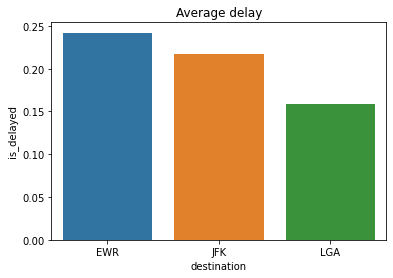

In [38]:
#Analyze the average delay by destination: Flights arriving EWR have higher average delays.
#Although LGA is the busiest airport, flights to LGA are less likely to delay.
average_delay_by_destination = delays_df.groupby('destination')['is_delayed'].mean().reset_index()
sn.barplot(x='destination', y='is_delayed', data=average_delay_by_destination).set(title='Average delay')

In [39]:
#Analyze the distribution of delays at three airports over days.
aggregated_delays = delays_df.groupby(['destination', 'day_of_week', 'carrier'])['is_delayed'].mean().reset_index()

<AxesSubplot:xlabel='destination', ylabel='is_delayed'>

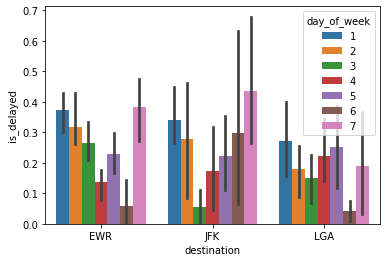

In [40]:
sn.barplot(x='destination', y='is_delayed', hue='day_of_week', data=aggregated_delays)

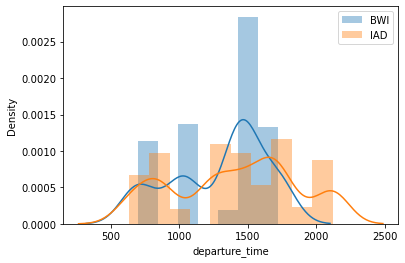

In [47]:
#Compare departure time of flights from BWI and IAD. 
#We see that there are more flights from BWI in the afternoons (especially around 15:00).
#In the late evenings, there are flights to NY only from IAD. 
sn.distplot(delays_df[delays_df['origin']=='BWI']['departure_time'],label='BWI')
sn.distplot(delays_df[delays_df['origin']=='IAD']['departure_time'],label='IAD')
plt.legend()

[Text(0.5, 1.0, 'Average delay')]

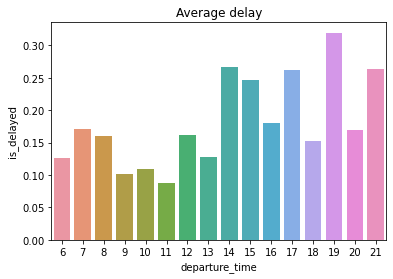

In [41]:
#Analyze the average delay by departure time: Flights in the evening delay more compared to morning flights.
temp_df = pd.DataFrame({'departure_time': delays_df['departure_time']//100, 
                            'is_delayed': delays_df['is_delayed']})
average_delay_by_departure= temp_df.groupby('departure_time')['is_delayed'].mean().reset_index()
sn.barplot(x='departure_time', y='is_delayed', data=average_delay_by_departure).set(title='Average delay')